In [55]:
import pandas as pd

In [56]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

nomes_m

In [57]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [58]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [59]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [60]:
frames = [nomes_f, nomes_m] #juntando frames

In [61]:
nomes = pd.concat(frames)['nome'].to_frame() #juntando frames

In [62]:
nomes.sample(5) # mostra 5 nomes aleatorios

,nome
59,ISABEL
172,REBECA
130,JUNIOR
70,JOAQUIM
171,VALDEMIR


## Incluindo ID dos alunos

In [63]:
import numpy as np

In [64]:
np.random.seed(123)

In [65]:
total_alunos = len(nomes)
total_alunos

400

In [66]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [67]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [68]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [69]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@dominiodoemail.com.br
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br
198,ALVARO,383,@dominiodoemail.com.br


In [70]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [71]:
nomes.sample(5)

,nome,id_aluno,dominio,email
84,SEVERINO,78,@dominiodoemail.com.br,severino@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com,jose@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br,iago@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br,sandra@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br


## Criando a Tabela Cursos

In [72]:
!pip3 install html5lib
!pip3 install lxml

In [73]:
import html5lib

In [74]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [75]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [76]:
cursos = cursos[0] # convertendo a lista para um data frame

## Alterando Index dos Cursos

In [77]:
cursos = cursos.rename(columns = {'Nome do curso': 'nome_do_curso'})

In [78]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [79]:
cursos['id'] = cursos.index + 1 # add coluna

In [80]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [81]:
cursos = cursos.set_index('id')

In [82]:
cursos.head(5)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [83]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


## Matriculando os alunos nos cursos

In [90]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos)*1.5).astype(int) # criando numero de matriculas
# exponential cria disparidade entre poucas e muitas, e ceil arredonda pra cima retirando os zeros

In [91]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br,2
18,RAIMUNDO,70,@dominiodoemail.com.br,raimundo@dominiodoemail.com.br,4
8,PATRICIA,379,@servicodoemail.com,patricia@servicodoemail.com,1
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,1
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com,2


In [92]:
nomes.matriculas.describe()

count    400.000000
mean       2.002500
std        1.306431
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: matriculas, dtype: float64

In [93]:
import seaborn as sns

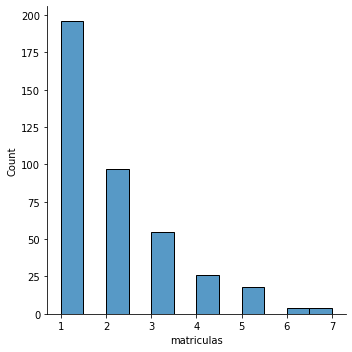

In [98]:
sns.displot(nomes.matriculas)

In [99]:
nomes.matriculas.value_counts()

1    196
2     97
3     55
4     26
5     18
7      4
6      4
Name: matriculas, dtype: int64

## Selecionando cursos

In [100]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
125,BENEDITA,20,@dominiodoemail.com.br,benedita@dominiodoemail.com.br,1
38,JAQUELINE,76,@servicodoemail.com,jaqueline@servicodoemail.com,3
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,1
190,LURDES,346,@dominiodoemail.com.br,lurdes@dominiodoemail.com.br,2
40,APARECIDA,238,@servicodoemail.com,aparecida@servicodoemail.com,1


In [120]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [104]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [107]:
matriculas.head(10)

,id_aluno,id_curso
0,235,4
1,235,17
2,235,1
3,235,16
4,235,7
5,43,12
6,304,4
7,156,12
8,343,3
9,343,15


In [116]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,63,Lógica de programação
2,68,Java para Web
3,22,C# para Web
4,64,Ruby on Rails
5,59,Cursos de Python
6,37,PHP com MySql
7,25,.NET para web
8,16,Novas integrações com Java
9,47,TDD com Java


In [113]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
23,LARISSA,173,@servicodoemail.com,larissa@servicodoemail.com,2
50,VINICIUS,183,@servicodoemail.com,vinicius@servicodoemail.com,1
80,TAIS,179,@dominiodoemail.com.br,tais@dominiodoemail.com.br,1


In [114]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [115]:
matriculas.head()

,id_aluno,id_curso
0,235,4
1,235,17
2,235,1
3,235,16
4,235,7


In [117]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'quantidade_de_alunos'})

In [121]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,63,Lógica de programação
2,68,Java para Web
3,22,C# para Web
4,64,Ruby on Rails
5,59,Cursos de Python


## Saída em diferentes formatos

In [123]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [124]:
matriculas_json = matriculas_por_curso.to_json()

In [125]:
matriculas_json

'{"quantidade_de_alunos":{"1":63,"2":68,"3":22,"4":64,"5":59,"6":37,"7":25,"8":16,"9":47,"10":36,"11":21,"12":46,"13":50,"14":29,"15":72,"16":53,"17":4,"18":36,"19":13,"20":40},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [126]:
matriculas_html = matriculas_por_curso.to_html()

In [128]:
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>63</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>68</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>22</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>64</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>59</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>37</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>25</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>16</td>\n      <td>Novas integrações com Java</td>\n

In [129]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>63</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>68</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>22</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>64</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>59</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>37</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>25</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>16</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>47</td>


## Criando o Banco SQL

In [131]:
!pip install sqlalchemy

In [132]:
from sqlalchemy import create_engine, MetaData, Table

In [133]:
engine = create_engine('sqlite:///: memory:')

In [134]:
engine

Engine(sqlite:///: memory:)

In [135]:
type(engine)

sqlalchemy.engine.base.Engine

In [136]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,63,Lógica de programação
2,68,Java para Web
3,22,C# para Web
4,64,Ruby on Rails
5,59,Cursos de Python


In [137]:
matriculas_por_curso.to_sql('matriculas', engine)

In [138]:
print(engine.table_names())

['matriculas']


## Buscando do banco SQL

In [139]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [140]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,8,16,Novas integrações com Java
1,17,4,Internet das coisas
2,19,13,Boas práticas em Java


In [141]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,63
1,Java para Web,68
2,C# para Web,22
3,Ruby on Rails,64
4,Cursos de Python,59
5,PHP com MySql,37
6,.NET para web,25
7,Novas integrações com Java,16
8,TDD com Java,47
9,Código limpo com C#,36


In [142]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [146]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 60')

In [147]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,63
1,Java para Web,68
3,Ruby on Rails,64
14,Análise de dados,72


## Escrevendo no Banco

In [148]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

In [149]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


## Nomes dos Alunos e Alunas da Próxima turma

In [150]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [151]:
proxima_turma

,id_aluno,id_curso
3,235,16
46,16,16
47,16,16
99,27,16
102,102,16
104,276,16
125,21,16
168,324,16
171,329,16
180,381,16


In [152]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
109,GEOVANA,300,@dominiodoemail.com.br,geovana@dominiodoemail.com.br,2
1,JOAO,24,@servicodoemail.com,joao@servicodoemail.com,1
62,VICTOR,216,@servicodoemail.com,victor@servicodoemail.com,2


In [154]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
13,16,EVA,@servicodoemail.com,eva@servicodoemail.com,5
13,16,EVA,@servicodoemail.com,eva@servicodoemail.com,5
16,16,CLAUDIA,@servicodoemail.com,claudia@servicodoemail.com,6
16,16,CLAUDIA,@servicodoemail.com,claudia@servicodoemail.com,6
18,16,ODAIR,@dominiodoemail.com.br,odair@dominiodoemail.com.br,1
21,16,BIANCA,@servicodoemail.com,bianca@servicodoemail.com,7
23,16,NEUZA,@servicodoemail.com,neuza@servicodoemail.com,3
27,16,RAFAELA,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,3
47,16,ALESSANDRO,@servicodoemail.com,alessandro@servicodoemail.com,2


In [156]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
13            EVA
13            EVA
16        CLAUDIA
16        CLAUDIA
18          ODAIR
21         BIANCA
23          NEUZA
27        RAFAELA
47     ALESSANDRO
69          DENIS
69          DENIS
79          TAINA
81         INGRID
81         INGRID
84          KAUAN
91         LORENA
94         TALITA
95         BRENDA
97          ELTON
101        MANOEL
102         JOANA
104        MILTON
109         KELLY
112          EDER
120         JONAS
129          NAIR
134        GILSON
135        MIRIAN
135        MIRIAN
140        WAGNER
143       ROBERTA
152     SEBASTIAO
164         MARIO
175       ROGERIO
210         JULIO
235         MARIA
257       ADILSON
258      BENEDITO
270         MARCO
273         ALICE
276         LUZIA
282       MARILIA
300       GEOVANA
318       GERALDO
321      FERNANDO
321      FERNANDO
324        MARINA
329        MONICA
342       EDUARDA
345          IGOR
345          IGOR
381      CRISTINA
393         JOSUE
Name: nome, dtype: object

In [157]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
13,EVA
13,EVA
16,CLAUDIA
16,CLAUDIA
18,ODAIR
21,BIANCA
23,NEUZA
27,RAFAELA
47,ALESSANDRO


In [158]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [159]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [160]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [161]:
proxima_turma

,nome
id_aluno,
13,EVA
13,EVA
16,CLAUDIA
16,CLAUDIA
18,ODAIR
21,BIANCA
23,NEUZA
27,RAFAELA
47,ALESSANDRO


In [163]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [164]:
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
13,EVA
13,EVA
16,CLAUDIA
16,CLAUDIA
18,ODAIR
21,BIANCA
23,NEUZA
27,RAFAELA
47,ALESSANDRO


## Excel

In [166]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)